# ▒ 판별분석 ▒

## 0. 환경설정

In [27]:
import os
import numpy as np
import pandas as pd
import collections
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## 1. 데이터 준비

### Iris dataset

- 150개의 붓꽃에 대한 데이터
- sepal length: 꽃받침의 길이
- sepal width: 꽃받침의 너비
- petal length: 꽃잎의 길이
- petal width: 꽃잎의 너비
- species: 붓꽃의 종류 (setosa, versicolor, virginica)

In [2]:
iris = sns.load_dataset('iris')
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 데이터 분할
- 전체 데이터를 7:3으로 분할하여 각각 학습 데이터, 시험 데이터로 사용한다.
- 입력 데이터를 표준화한다.

In [30]:
X = iris[['sepal_length','sepal_width',\
              'petal_length','petal_width']]
y = iris.iloc[:,4]

In [39]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.3, random_state=123)

In [40]:
scaler = StandardScaler()   
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

## 2. 데이터 시각화
- 설명변수들 사이의 관계를 파악하기 위해 시각화를 시행한다.

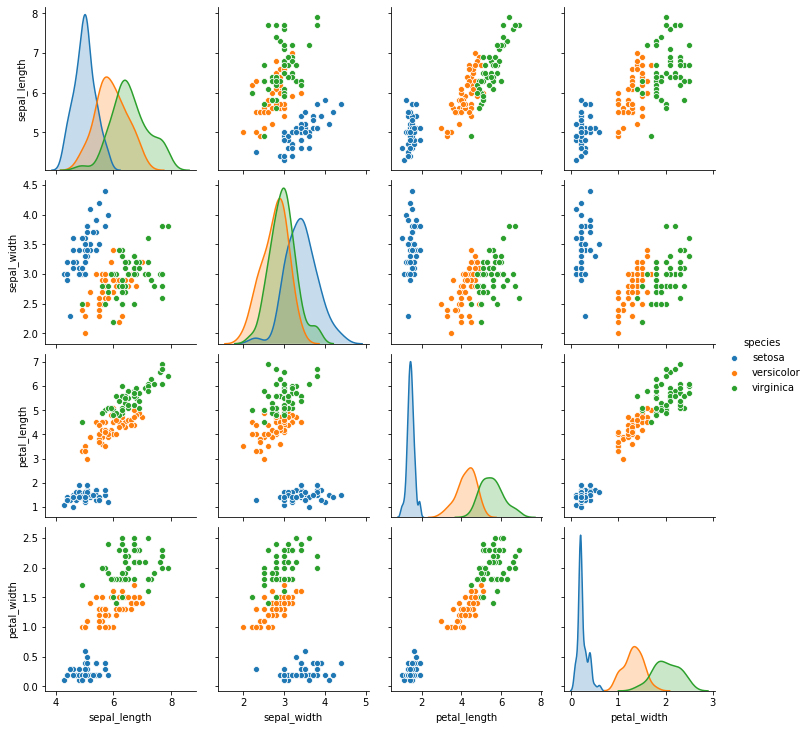

In [41]:
sns.pairplot(iris, diag_kind='kde', hue='species')
plt.show()

## 3. K-NN

### 최적의 K값 찾기
- 검증 자료를 사용하여 최적의 K값을 찾아본다.
- 학습 자료를 다시 7:3으로 분할하여 사용한다.

In [42]:
X_tr_temp, X_val_temp, y_tr_temp, y_val_temp = \
train_test_split(X_train, y_train, test_size = 0.3, random_state=1234)

In [43]:
k_grid = range(1, 21, 1)
acc_list = []

for k_ in k_grid:
    model = KNeighborsClassifier(n_neighbors=k_)
    model.fit(X_tr_temp, y_tr_temp)
    y_pred = model.predict(X_val_temp)
    sub_acc = round((y_pred == y_val_temp).mean(), 2)
    acc_list.append(sub_acc)

KnnRes_df = pd.DataFrame({'k' : k_grid, 'Accuracy' : acc_list})

- 정분류율이 제일 높은 K값을 선택한다.

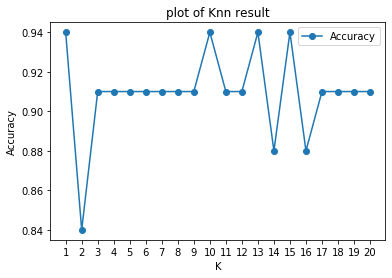

In [44]:
KnnRes_df.plot.line(x ='k', y='Accuracy', style=['-o'], xticks=(list(k_grid)))
plt.title("plot of Knn result")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [45]:
KnnoptimalK = KnnRes_df['k'].iloc[KnnRes_df['Accuracy'].idxmax()]
print(KnnoptimalK)
knn_model = KNeighborsClassifier(n_neighbors=KnnoptimalK)
knn_model.fit(X_train, y_train)

1


KNeighborsClassifier(n_neighbors=1)

- 시험 자료에 적합하여 정분류율 및 confusion matrix를 구한다.

In [46]:
y_test_pred_knn = knn_model.predict(X_test)
confusion_matrix(y_test, y_test_pred_knn)

array([[18,  0,  0],
       [ 0,  9,  1],
       [ 0,  2, 15]])

In [47]:
knn_model.score(X_test, y_test)

0.9333333333333333

## 4. Gaussian Naive Bayes

In [48]:
GNB_model = GaussianNB().fit(X_train, y_train)
y_test_pred_GNB = GNB_model.predict(X_test) 
confusion_matrix(y_test, y_test_pred_GNB)

array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 15]])

In [49]:
GNB_model.score(X_test, y_test)

0.9555555555555556